<a href="https://colab.research.google.com/github/ApahSaroj/WQC/blob/main/wqcpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/gyana-ranjan-dash/water-potability/blob/main/water_probability.ipynb

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#df.drop(df.columns[df.columns.str.contains('WPI',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('WQC',case = False)],axis = 1, inplace = True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [4]:
def quality_check(num):
    s= ''
    if num <=0.5 :
        s='Suitable'
    elif num > 0.5:
        s='Unsuitable'
    return s

In [5]:
df['WQC']=df['WPI'].apply(quality_check)

In [6]:
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Suitable
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Suitable
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Suitable
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Suitable
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Suitable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Suitable
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Suitable
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Suitable
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Unsuitable


In [7]:
!pip install pycaret

In [8]:
!pip install shap

In [9]:
import shap

In [10]:
import os               
import numpy                   as np
import pandas                  as pd 
import matplotlib.pyplot       as plt
import seaborn                 as sns
from pycaret.classification import *
from plotnine import*
import datetime as dt
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
import plotly.express          as ex
import plotly.graph_objs       as go
import plotly.offline          as pyo
import scipy.stats             as stats
import pymc3                   as pm
import theano.tensor           as tt
from plotly.subplots           import make_subplots
from sklearn.preprocessing     import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition     import TruncatedSVD,PCA
from sklearn.ensemble          import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree              import DecisionTreeClassifier
from sklearn.linear_model      import LinearRegression,LogisticRegressionCV

from sklearn.svm               import SVC
from sklearn.metrics           import mean_squared_error,r2_score
from sklearn.pipeline          import Pipeline
from sklearn.model_selection   import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.manifold          import Isomap,TSNE
from sklearn.feature_selection import mutual_info_classif
from tqdm.notebook             import tqdm
from scipy.stats               import ttest_ind
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline

In [11]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528,Suitable
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400,Suitable
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814,Suitable
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282,Suitable
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831,Suitable


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          487 non-null    float64
 1   DO          487 non-null    float64
 2   TDS         487 non-null    float64
 3   Alkalinity  487 non-null    float64
 4   EC          487 non-null    float64
 5   Na          487 non-null    float64
 6   Ca          487 non-null    float64
 7   Mg          487 non-null    float64
 8   K           487 non-null    float64
 9   F           487 non-null    float64
 10  Cl          487 non-null    float64
 11  Nitrate     487 non-null    float64
 12  Sulphate    487 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         487 non-null    float64
 15  WQC         487 non-null    object 
dtypes: float64(15), object(1)
memory usage: 61.0+ KB


In [13]:
df.drop(df.columns[df.columns.str.contains('WPI',case = False)],axis = 1, inplace = True)
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,Suitable
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,Suitable
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,Suitable
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,Suitable
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,Suitable


In [14]:
df.describe(include='all', percentiles=[.25, .50, .75, .95,.99])

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,485.000000,487
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suitable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460
mean,7.809275,7.441561,115.752156,62.225873,196.536591,8.906119,43.683778,24.361396,3.036222,0.511795,14.175075,1.286371,14.791693,0.089608,NaN
std,0.411216,1.107170,47.283961,20.068358,81.088229,5.719637,17.846355,10.815360,2.304195,0.494124,9.279435,1.838680,14.644176,0.156697,NaN
min,5.100000,4.200000,56.000000,8.000000,98.000000,2.190000,14.000000,2.000000,0.500000,0.059000,3.800000,0.003985,0.792000,0.000000,NaN
25%,7.560000,6.700000,84.000000,50.000000,140.000000,5.295000,32.000000,16.000000,1.735000,0.249000,8.625625,0.244000,5.472000,0.023700,NaN
50%,7.860000,7.400000,102.000000,56.000000,171.000000,7.100000,40.000000,22.000000,2.410000,0.312000,11.100000,0.527000,9.450000,0.046253,NaN
75%,8.100000,8.100000,129.000000,72.000000,219.500000,10.235000,52.000000,28.000000,3.400000,0.468000,16.370625,1.506928,18.030000,0.091000,NaN


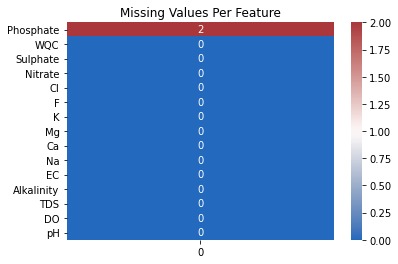

In [15]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')
plt.show()

In [16]:
df.isnull().mean()*100

pH            0.000000
DO            0.000000
TDS           0.000000
Alkalinity    0.000000
EC            0.000000
Na            0.000000
Ca            0.000000
Mg            0.000000
K             0.000000
F             0.000000
Cl            0.000000
Nitrate       0.000000
Sulphate      0.000000
Phosphate     0.410678
WQC           0.000000
dtype: float64

In [20]:
# Transforming the WQC variable, labels are chosen randomly
y = df.iloc[:, -1].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0]


In [22]:
df['WQC']=y
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0


In [23]:
df.tail()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
482,7.6,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480,0.015,0
483,7.3,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068,0.033,0
484,5.1,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910,0.163,0
485,7.4,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500,0.219,1
486,7.6,6.9,243.0,68.0,410.8,17.41,82.0,50.0,9.92,1.310,34.89,6.385000,59.940,0.070,0


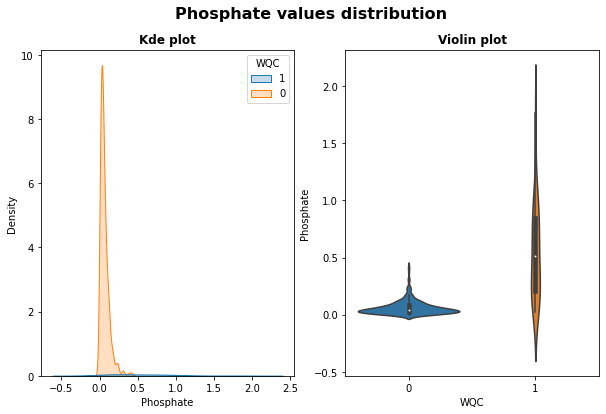

In [24]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (10,6))
sns.kdeplot(x = 'Phosphate', hue = 'WQC', fill = True, data = df, hue_order=[1,0], ax = axis1)
sns.violinplot(x = 'WQC', y = 'Phosphate', data = df, ax = axis2)

axis1.set_title('Kde plot', size = 12, weight = 'bold')
axis2.set_title('Violin plot', size = 12, weight = 'bold')
fig.suptitle('Phosphate values distribution', size = 16, weight = 'bold');

In [25]:
# Impute Missing Values with Label Matching Mean
for col in ['Phosphate']:
    missing_label_0 = df.query('WQC == 0')[col][df[col].isna()].index
    df.loc[missing_label_0,col] = df.query('WQC == 0')[col][df[col].notna()].mean()

    missing_label_1 = df.query('WQC == 1')[col][df[col].isna()].index
    df.loc[missing_label_1,col] = df.query('WQC == 1')[col][df[col].notna()].mean()

IndexError: ignored

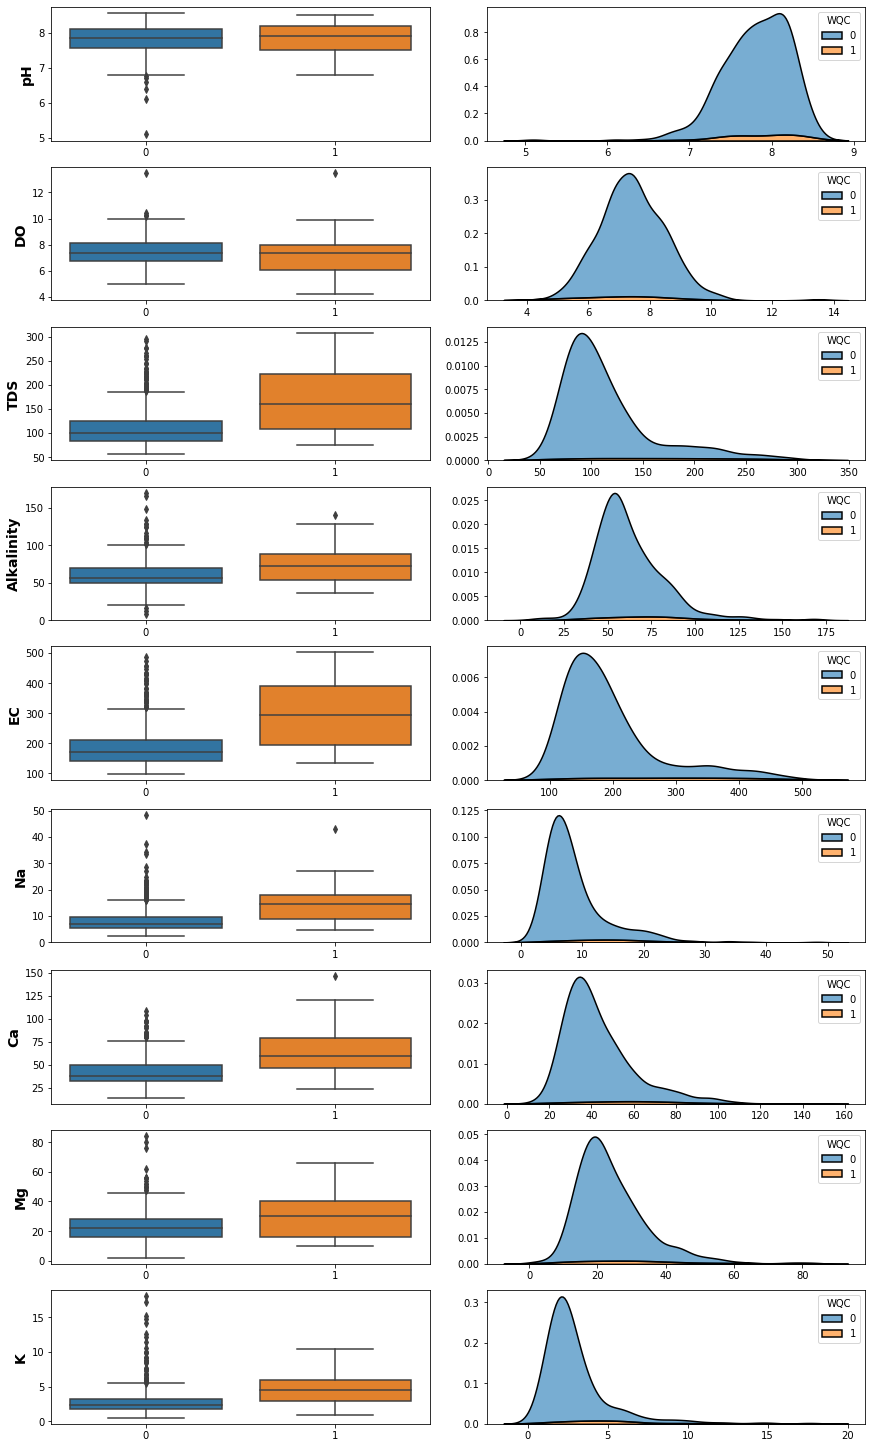

In [26]:
fig, ax = plt.subplots(9, 2, figsize=(12,20), constrained_layout = True)
numeric_col = df.select_dtypes(float).columns.to_list()
for i, col in enumerate(numeric_col):
    sns.boxplot(x = 'WQC', y = col, data = df, ax = ax[i][0])
    
    sns.kdeplot(x = col, hue = 'WQC', fill = True, multiple = 'stack',
                alpha = 0.6, linewidth = 1.5, data = df, ax = ax[i][1])
    ax[i][0].set_xlabel(None)
    ax[i][0].set_ylabel(col, size = 14, weight = 'bold')
    ax[i][1].set_xlabel(None)
    ax[i][1].set_ylabel(None)
    
fig.suptitle('Features Analysis', size = 16, weight = 'bold');

<Figure size 432x288 with 0 Axes>

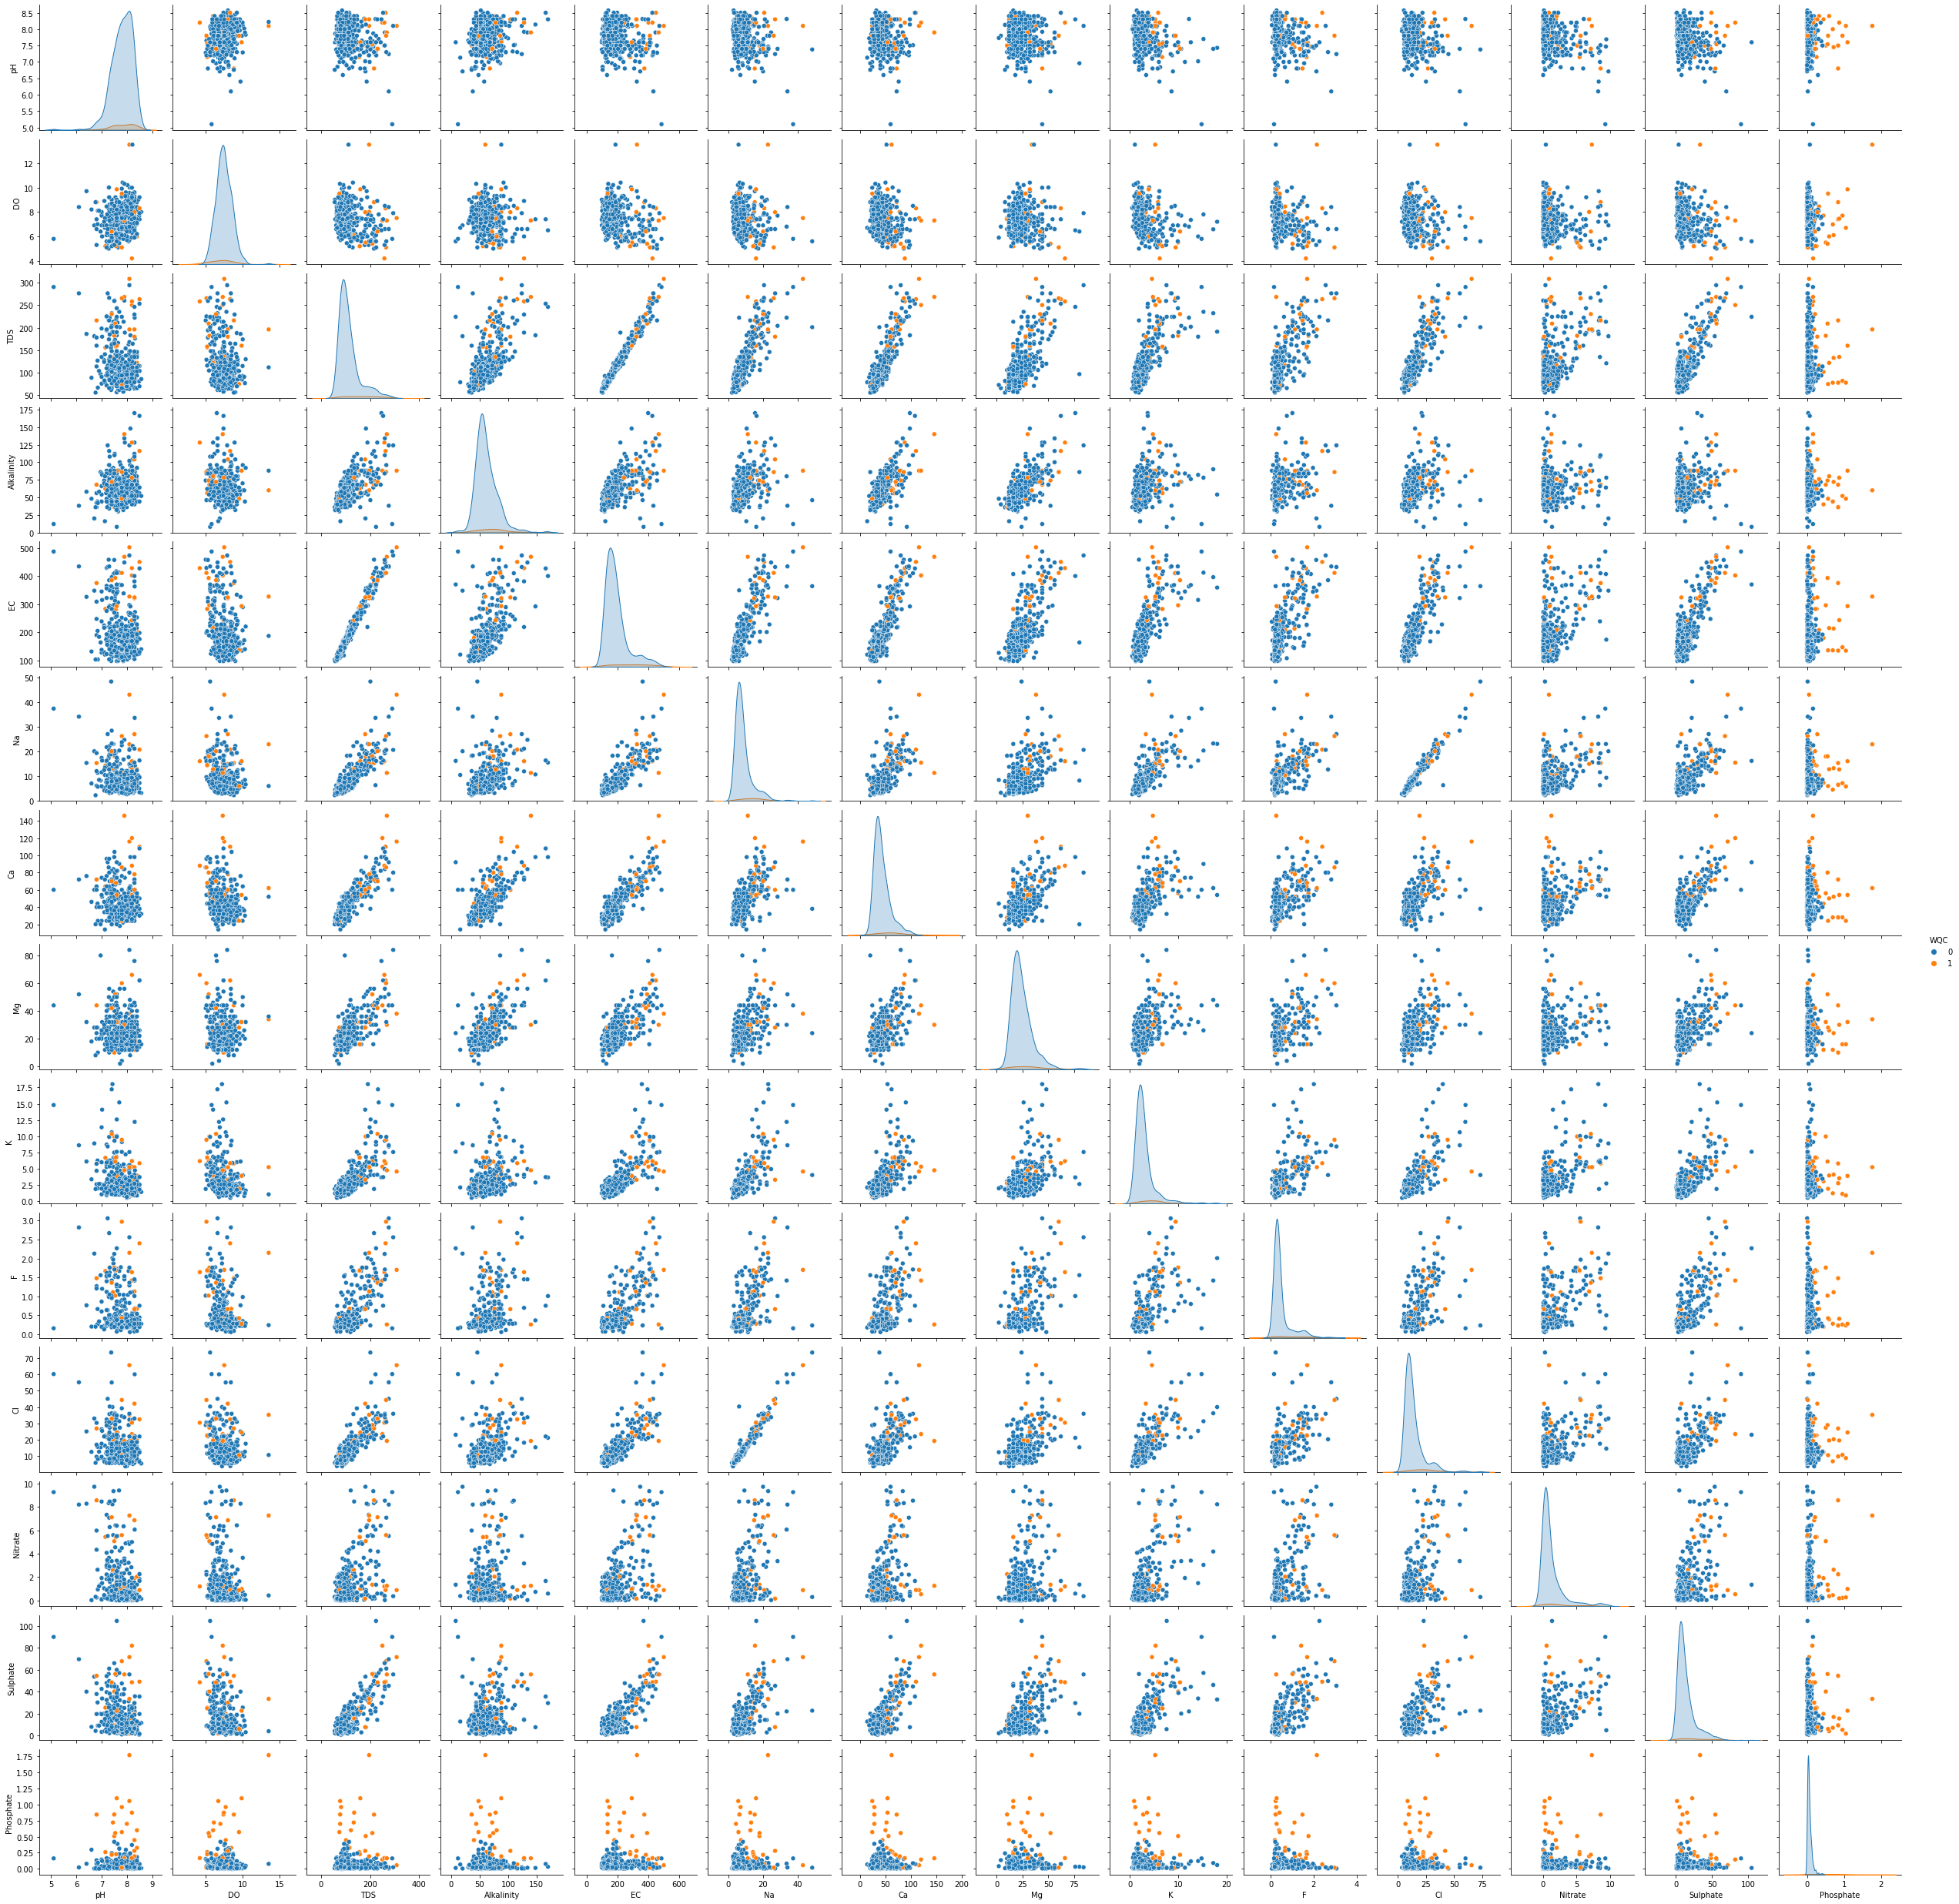

In [28]:
fig = plt.figure()
sns.pairplot(df, hue = 'WQC')

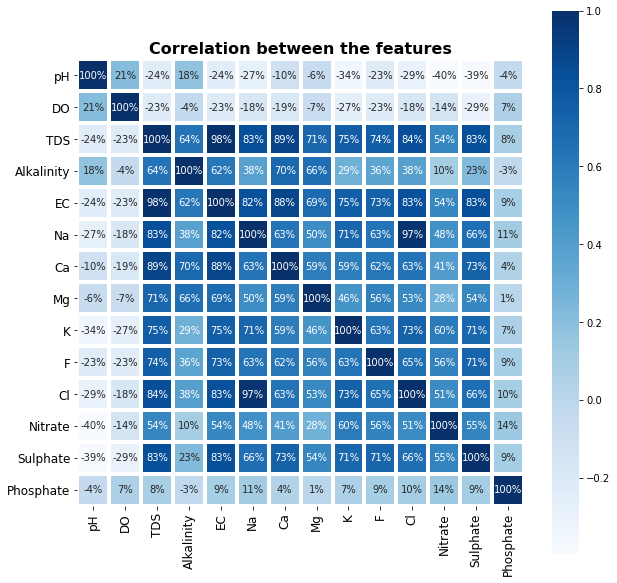

In [31]:
# Correlation between numeric variables
fig=plt.figure(figsize=(10,10))
axis=sns.heatmap(df[numeric_col].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16, weight='bold', y=1.05);
axis.set_xticklabels(numeric_col, fontsize=12)
axis.set_yticklabels(numeric_col, fontsize=12, rotation=0);

In [33]:
# Using 'setup' from pycaret.classification for preprocessing the data
clf = setup(df, target = 'WQC',
            remove_outliers = True, outliers_threshold = 0.05, # Removing outliers with threshold of 5 percentile
            numeric_imputation = 'mean', # Imputing missing values with mean
            normalize = True, # Normalizing the features, so that Gradient Descent will converge fast
            normalize_method = 'zscore', # Mean => 0 and std. deviation => 1
            train_size = 0.8,
            fold = 10, # Number of K-folds
            use_gpu = True)

,Description,Value
0,session_id,6605
1,Target,WQC
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(487, 15)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
#comparing all the models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9946,0.9986,0.90,1.0000,0.9333,0.9308,0.9394,0.055
svm,SVM - Linear Kernel,0.9919,0.0000,0.80,0.9000,0.8333,0.8308,0.8394,0.012
ada,Ada Boost Classifier,0.9919,0.9972,0.90,0.9500,0.9000,0.8963,0.9092,0.132
dt,Decision Tree Classifier,0.9892,0.9236,0.85,0.9500,0.8667,0.8617,0.8789,0.015
rf,Random Forest Classifier,0.9892,0.9986,0.75,0.9000,0.8000,0.7963,0.8092,1.030
gbc,Gradient Boosting Classifier,0.9892,0.9486,0.85,0.9500,0.8667,0.8617,0.8789,0.168
lr,Logistic Regression,0.9865,0.9972,0.70,0.8000,0.7333,0.7281,0.7367,0.021
ridge,Ridge Classifier,0.9865,0.0000,0.70,0.9000,0.7667,0.7617,0.7789,0.016
lda,Linear Discriminant Analysis,0.9865,1.0000,0.75,0.8667,0.7800,0.7749,0.7896,0.014
et,Extra Trees Classifier,0.9838,0.9993,0.65,0.8000,0.7000,0.6963,0.7092,0.970


In [35]:
# Creating the model
GBM = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0,1.0,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0,1.0,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0,1.0,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0,1.0,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0,1.0,1.0000,1.0000,1.0000
5,0.9730,1.0000,0.5,1.0,0.6667,0.6542,0.6972
6,0.9730,0.9857,0.5,1.0,0.6667,0.6542,0.6972
7,1.0000,1.0000,1.0,1.0,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0,1.0,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0,1.0,1.0000,1.0000,1.0000


In [36]:
# Results for Test set
result = predict_model(GBM)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9898,0.9837,0.8333,1.0,0.9091,0.9037,0.9079


In [37]:
#hyperparameter tuning
tune_model(GBM, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
1,0.9730,1.0,0.0000,0.0,0.0000,0.0000,0.0000
2,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
3,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
4,0.9730,1.0,0.5000,1.0,0.6667,0.6542,0.6972
5,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000
6,0.9730,1.0,0.5000,1.0,0.6667,0.6542,0.6972
7,0.9730,1.0,0.5000,1.0,0.6667,0.6542,0.6972
8,0.9730,1.0,0.5000,1.0,0.6667,0.6542,0.6972
9,1.0000,1.0,1.0000,1.0,1.0000,1.0000,1.0000


LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=31, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=190, n_jobs=-1, num_leaves=6, objective=None,
               random_state=6605, reg_alpha=0.01, reg_lambda=0.005, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

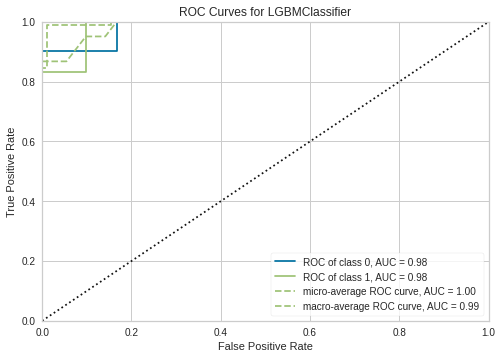

In [38]:
plot_model(GBM)

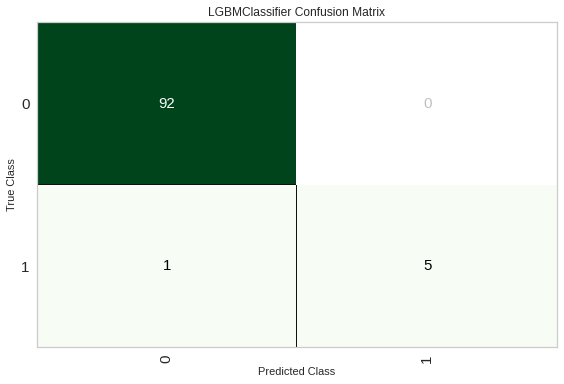

In [39]:
#confusion matrix
plot_model(GBM, plot = 'confusion_matrix')

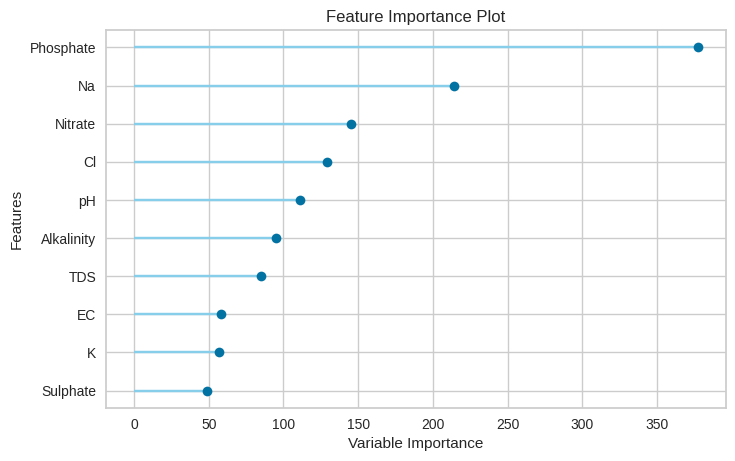

In [40]:
plot_model(GBM, 'feature')

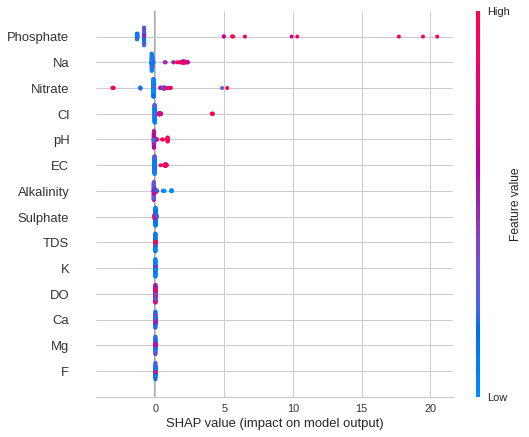

In [41]:
interpret_model(GBM)

In [42]:
interpret_model(GBM, plot = 'reason', observation =30)